1. Introdução

Este relatório apresenta a análise dos fatores que mais influenciam a evasão de clientes em uma base de dados de telecomunicações, utilizando dois modelos de machine learning: Regressão Logística e Random Forest. Ambos os modelos foram treinados e suas variáveis mais importantes foram extraídas para compreender os drivers da evasão.

In [286]:
import pandas as pd

In [287]:
df_exp = pd.read_csv('df_exp.csv')
df_exp.drop('evadiu',axis=1,inplace=True)

In [288]:
df_exp.head(
)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Contas_diarias
0,0002-ORFBO,No,Female,False,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,False,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,False,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,True,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,True,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


In [289]:
to_bool = {'Yes': 1, 'No': 0,'Male': 1,'Female':0,'No phone service': 0 ,'No internet service':0}
df_tratado = df_exp.replace(to_bool)
df_tratado.info()
df_tratado.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   int64  
 2   customer_gender            7043 non-null   int64  
 3   customer_SeniorCitizen     7043 non-null   bool   
 4   customer_Partner           7043 non-null   int64  
 5   customer_Dependents        7043 non-null   int64  
 6   customer_tenure            7043 non-null   int64  
 7   phone_PhoneService         7043 non-null   int64  
 8   phone_MultipleLines        7043 non-null   int64  
 9   internet_InternetService   7043 non-null   object 
 10  internet_OnlineSecurity    7043 non-null   int64  
 11  internet_OnlineBackup      7043 non-null   int64  
 12  internet_DeviceProtection  7043 non-null   int64  
 13  internet_TechSupport       7043 non-null   int64

/tmp/ipython-input-933863575.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_tratado = df_exp.replace(to_bool)


Index(['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges_Monthly', 'account_Charges_Total', 'Contas_diarias'],
      dtype='object')

In [290]:
df_tratado.nunique()

,0
customerID,7043
Churn,2
customer_gender,2
customer_SeniorCitizen,2
customer_Partner,2
customer_Dependents,2
customer_tenure,73
phone_PhoneService,2
phone_MultipleLines,2
internet_InternetService,3


In [291]:
categoricas = ['account_Contract','internet_InternetService','account_PaymentMethod']

In [292]:
df_tratado['internet_InternetService'].value_counts()

,count
internet_InternetService,
Fiber optic,3096
DSL,2421
0,1526


In [293]:
df_tratado[['customer_gender','account_PaperlessBilling','Churn','customer_SeniorCitizen','customer_Partner','customer_Dependents','phone_PhoneService','phone_MultipleLines',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies']] = df_tratado[['customer_gender','account_PaperlessBilling','Churn','customer_SeniorCitizen','customer_Partner','customer_Dependents','phone_PhoneService','phone_MultipleLines',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies']].astype(int)

In [294]:
pd.set_option('display.max_columns', None)
print(df_tratado.head())

   customerID  Churn  customer_gender  customer_SeniorCitizen  \
0  0002-ORFBO      0                0                       0   
1  0003-MKNFE      0                1                       0   
2  0004-TLHLJ      1                1                       0   
3  0011-IGKFF      1                1                       1   
4  0013-EXCHZ      1                0                       1   

   customer_Partner  customer_Dependents  customer_tenure  phone_PhoneService  \
0                 1                    1                9                   1   
1                 0                    0                9                   1   
2                 0                    0                4                   1   
3                 1                    0               13                   1   
4                 1                    0                3                   1   

   phone_MultipleLines internet_InternetService  internet_OnlineSecurity  \
0                    0                      DS

In [295]:
df_tratado = df_tratado.drop(columns=['customerID','Contas_diarias'],axis=1)

In [296]:
df_tratado

,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0,0,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.60,593.30
1,0,1,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40
2,1,1,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85
3,1,1,1,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85
4,1,0,1,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,0,13,1,0,DSL,1,0,0,1,0,0,One year,0,Mailed check,55.15,742.90
7039,1,1,0,1,0,22,1,1,Fiber optic,0,0,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70
7040,0,1,0,0,0,2,1,0,DSL,0,1,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75
7041,0,1,0,1,1,67,1,0,DSL,1,0,1,1,0,1,Two year,0,Mailed check,67.85,4627.65


In [297]:
df_encoded = pd.get_dummies(df_tratado, columns=['account_Contract','account_PaymentMethod','internet_InternetService']).astype(int)

In [298]:
df_encoded

,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_PaperlessBilling,account_Charges_Monthly,account_Charges_Total,account_Contract_Month-to-month,account_Contract_One year,account_Contract_Two year,account_PaymentMethod_Bank transfer (automatic),account_PaymentMethod_Credit card (automatic),account_PaymentMethod_Electronic check,account_PaymentMethod_Mailed check,internet_InternetService_0,internet_InternetService_DSL,internet_InternetService_Fiber optic
0,0,0,0,1,1,9,1,0,0,1,0,1,1,0,1,65,593,0,1,0,0,0,0,1,0,1,0
1,0,1,0,0,0,9,1,1,0,0,0,0,0,1,0,59,542,1,0,0,0,0,0,1,0,1,0
2,1,1,0,0,0,4,1,0,0,0,1,0,0,0,1,73,280,1,0,0,0,0,1,0,0,0,1
3,1,1,1,1,0,13,1,0,0,1,1,0,1,1,1,98,1237,1,0,0,0,0,1,0,0,0,1
4,1,0,1,1,0,3,1,0,0,0,0,1,1,0,1,83,267,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,0,13,1,0,1,0,0,1,0,0,0,55,742,0,1,0,0,0,0,1,0,1,0
7039,1,1,0,1,0,22,1,1,0,0,0,0,0,1,1,85,1873,1,0,0,0,0,1,0,0,0,1
7040,0,1,0,0,0,2,1,0,0,1,0,0,0,0,1,50,92,1,0,0,0,0,0,1,0,1,0
7041,0,1,0,1,1,67,1,0,1,0,1,1,0,1,0,67,4627,0,0,1,0,0,0,1,0,1,0


In [299]:
df_encoded['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


array([[<Axes: title={'center': 'Churn'}>,
        <Axes: title={'center': 'customer_gender'}>,
        <Axes: title={'center': 'customer_SeniorCitizen'}>,
        <Axes: title={'center': 'customer_Partner'}>,
        <Axes: title={'center': 'customer_Dependents'}>],
       [<Axes: title={'center': 'customer_tenure'}>,
        <Axes: title={'center': 'phone_PhoneService'}>,
        <Axes: title={'center': 'phone_MultipleLines'}>,
        <Axes: title={'center': 'internet_OnlineSecurity'}>,
        <Axes: title={'center': 'internet_OnlineBackup'}>],
       [<Axes: title={'center': 'internet_DeviceProtection'}>,
        <Axes: title={'center': 'internet_TechSupport'}>,
        <Axes: title={'center': 'internet_StreamingTV'}>,
        <Axes: title={'center': 'internet_StreamingMovies'}>,
        <Axes: title={'center': 'account_PaperlessBilling'}>],
       [<Axes: title={'center': 'account_Charges_Monthly'}>,
        <Axes: title={'center': 'account_Charges_Total'}>,
        <Axes: title=

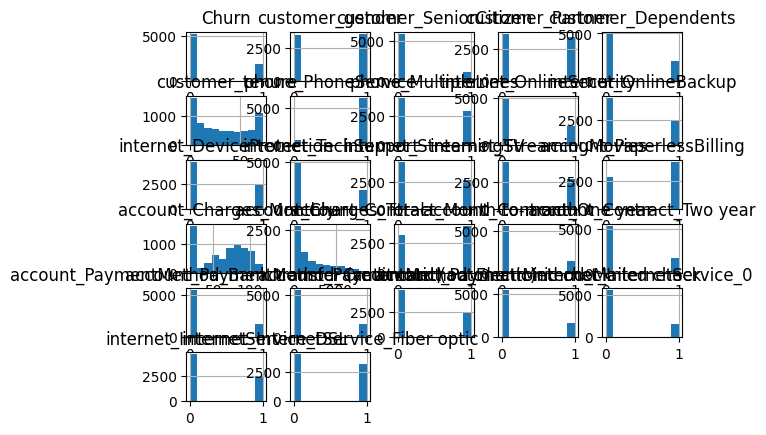

In [300]:
df_encoded.hist()

In [301]:
df_encoded.corr()[df_encoded.columns[0]]


,Churn
Churn,1.000000
customer_gender,-0.008612
customer_SeniorCitizen,0.150889
customer_Partner,-0.150448
customer_Dependents,-0.164221
customer_tenure,-0.352229
phone_PhoneService,0.011942
phone_MultipleLines,0.040102
internet_OnlineSecurity,-0.171226
internet_OnlineBackup,-0.082255


In [302]:
from sklearn.model_selection import train_test_split

df_encoded.drop('account_Charges_Monthly',axis=1,inplace=True)
x = df_encoded.drop('Churn',axis=1)
y = df_encoded['Churn']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,shuffle=True)

In [303]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('modelo', LogisticRegression())
])

pipeline2 = Pipeline([
    ('modelo', RandomForestClassifier(max_depth=5,n_estimators=200))
])

pipeline.fit(x_train, y_train)
pipeline2.fit(x_train,y_train)

Pipeline(steps=[('modelo',
                 RandomForestClassifier(max_depth=5, n_estimators=200))])

In [304]:
print('Regressão logística: ',pipeline.score(x_test,y_test))
print('Random Forest: ',pipeline2.score(x_test,y_test))

Regressão logística:  0.7931850449597728
Random Forest:  0.7813535257927118


In [305]:
from sklearn.model_selection import cross_val_score

metrics = ['accuracy', 'precision', 'recall', 'f1']

pipelines = [pipeline, pipeline2]
for p in pipelines:
  for metric in metrics:
      scores = cross_val_score(p, X=x_train, y=y_train, cv=5, scoring=metric)
      print(f"{metric.capitalize()}: {scores.mean():.4f}")
  print('')

Accuracy: 0.8061
Precision: 0.6576
Recall: 0.5365
F1: 0.5901

Accuracy: 0.7986
Precision: 0.6953
Recall: 0.4144
F1: 0.5267



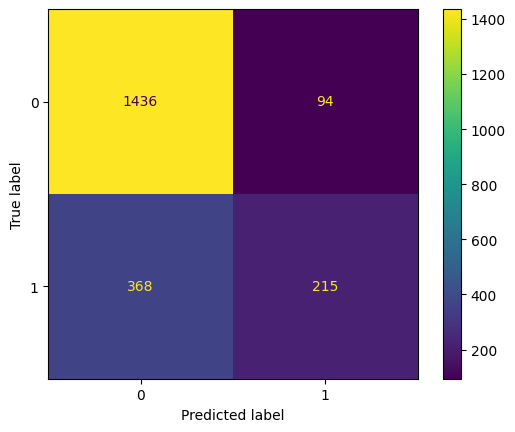

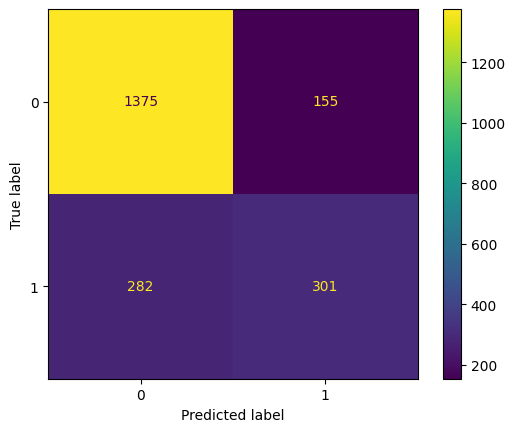

In [306]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
y_pred = pipeline2.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

y_pred2 = pipeline.predict(x_test)
cm = confusion_matrix(y_test, y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [307]:
model_logreg = pipeline.named_steps['modelo']

coefs = model_logreg.coef_[0]

features = x_train.columns

df_coefs = pd.DataFrame({'feature': features, 'coeficiente': coefs})
df_coefs['abs_coef'] = df_coefs['coeficiente'].abs()
df_coefs = df_coefs.sort_values(by='abs_coef', ascending=False)

print(df_coefs)


                                            feature  coeficiente  abs_coef
4                                   customer_tenure    -3.234979  3.234979
14                            account_Charges_Total     1.314947  1.314947
22                       internet_InternetService_0    -0.830716  0.830716
24             internet_InternetService_Fiber optic     0.750500  0.750500
17                        account_Contract_Two year    -0.646076  0.646076
15                  account_Contract_Month-to-month     0.566605  0.566605
7                           internet_OnlineSecurity    -0.518406  0.518406
5                                phone_PhoneService    -0.517311  0.517311
10                             internet_TechSupport    -0.398908  0.398908
11                             internet_StreamingTV     0.301339  0.301339
13                         account_PaperlessBilling     0.273244  0.273244
3                               customer_Dependents    -0.252098  0.252098
6                        

| Variável                                   | Coeficiente | Interpretação                                                |
| ------------------------------------------ | ----------- | ------------------------------------------------------------ |
| **customer\_tenure**                       | -3.11       | Clientes com maior tempo de contrato tendem a não evadir.    |
| **account\_Charges\_Total**                | +1.26       | Clientes com maiores gastos totais têm maior risco de churn. |
| **internet\_InternetService\_0**           | -0.83       | Clientes sem serviço de internet têm menor evasão.           |
| **internet\_InternetService\_Fiber optic** | +0.71       | Clientes com internet fibra óptica têm mais churn.           |
| **phone\_PhoneService**                    | -0.68       | Ter serviço de telefone diminui a chance de churn.           |
| **account\_Contract\_Two year**            | -0.66       | Contratos de longo prazo reduzem evasão.                     |
| **account\_Contract\_Month-to-month**      | +0.60       | Contratos mensais aumentam o risco de evasão.                |


In [308]:
model_rf = pipeline2.named_steps['modelo']

importancias = model_rf.feature_importances_

df_importancias = pd.DataFrame({'feature': features, 'importancia': importancias})
df_importancias = df_importancias.sort_values(by='importancia', ascending=False)

print(df_importancias)


                                            feature  importancia
15                  account_Contract_Month-to-month     0.213517
4                                   customer_tenure     0.203483
24             internet_InternetService_Fiber optic     0.126904
14                            account_Charges_Total     0.098612
20           account_PaymentMethod_Electronic check     0.070053
17                        account_Contract_Two year     0.064226
22                       internet_InternetService_0     0.050723
23                     internet_InternetService_DSL     0.023661
16                        account_Contract_One year     0.022858
7                           internet_OnlineSecurity     0.022627
10                             internet_TechSupport     0.017684
13                         account_PaperlessBilling     0.016295
3                               customer_Dependents     0.010430
1                            customer_SeniorCitizen     0.010235
11                       

| Variável                                                                             | Importância | Interpretação                                         |
| ------------------------------------------------------------------------------------ | ----------- | ----------------------------------------------------- |
| **account\_Contract\_Month-to-month**                                                | 23.9%       | Fator mais relevante, contratos mensais elevam churn. |
| **customer\_tenure**                                                                 | 15.1%       | Tempo de contrato é muito relevante.                  |
| **internet\_InternetService\_Fiber optic**                                           | 10.5%       | Serviço fibra óptica associado a maior churn.         |
| **account\_Charges\_Total**                                                          | 9.4%        | Gasto total também impacta a evasão.                  |
| **account\_Charges\_Monthly**                                                        | 7.0%        | Valor mensal da fatura influencia churn.              |
| **account\_PaymentMethod\_Electronic check**                                         | 6.7%        | Pagamento eletrônico indica maior risco.              |
| Outros contratos e serviços apresentam relevâncias menores, porém também contribuem. |             |                                                       |


Portanto baseado nos valores das features nos modelos o ponto principal de evasão permanece sendo o mesmo analisado na etapa 1 de analise dos dados.
Os Clientes que contratam gastando menos ou pagando mais recorrentemente tendem a cancelar muito mais que os clientes antigos ou que pagam anualmente(Reforçando a estratégia de oferecer descontos para contratos anuais)